In [67]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
legend_properties = {'weight':'bold'}

In [82]:
# Data Integration
data_folder = r"E:\data\dao-0310-23\V4_4\Turnover_6"
dao_performance_list, hierarchy_performance_list, autonomy_performance_list, hierarchy_performance_2_list = [], [], [], []
dao_diversity_list, hierarchy_diversity_list, autonomy_diversity_list, hierarchy_diversity_2_list = [], [], [], []
for file_index in range(1, 11):
    dao_performance_file = data_folder + r"\dao_performance_across_turnover_{0}".format(file_index)
    hierarchy_performance_file = data_folder + r"\hierarchy_performance_across_turnover_{0}".format(file_index)
    autonomy_performance_file = data_folder + r"\autonomy_performance_across_turnover_{0}".format(file_index)
    hierarchy_performance_2_file = data_folder + r"\hierarchy_performance_across_only_individual_turnover_{0}".format(file_index)

    dao_diversity_file = data_folder + r"\dao_diversity_across_turnover_{0}".format(file_index)
    hierarchy_diversity_file = data_folder + r"\hierarchy_diversity_across_turnover_{0}".format(file_index)
    autonomy_diversity_file = data_folder + r"\autonomy_diversity_across_turnover_{0}".format(file_index)
    hierarchy_diversity_2_file = data_folder + r"\hierarchy_diversity_across_only_individual_turnover_{0}".format(file_index)

    # dao_variance_file = data_folder + r"\dao_variance_across_turnover_{0}".format(file_index)
    # hierarchy_variance_file = data_folder + r"\hierarchy_variance_across_turnover_{0}".format(file_index)
    # autonomy_variance_file = data_folder + r"\autonomy_variance_across_turnover_{0}".format(file_index)

    with open(dao_performance_file, 'rb') as infile:
        dao_performance = pickle.load(infile)
    with open(hierarchy_performance_file, 'rb') as infile:
        hierarchy_performance = pickle.load(infile)
    with open(autonomy_performance_file, 'rb') as infile:
        autonomy_performance = pickle.load(infile)
    with open(hierarchy_performance_2_file, 'rb') as infile:
        hierarchy_performance_2 = pickle.load(infile)

    with open(dao_diversity_file, 'rb') as infile:
        dao_diversity = pickle.load(infile)
    with open(hierarchy_diversity_file, 'rb') as infile:
        hierarchy_diversity = pickle.load(infile)
    with open(autonomy_diversity_file, 'rb') as infile:
        autonomy_diversity = pickle.load(infile)
    with open(hierarchy_diversity_2_file, 'rb') as infile:
        hierarchy_diversity_2 = pickle.load(infile)

    dao_performance_list.append(dao_performance)
    hierarchy_performance_list.append(hierarchy_performance)
    autonomy_performance_list.append(autonomy_performance)
    hierarchy_performance_2_list.append(hierarchy_performance_2)

    dao_diversity_list.append(dao_diversity)
    hierarchy_diversity_list.append(hierarchy_diversity)
    autonomy_diversity_list.append(autonomy_diversity)
    hierarchy_diversity_2_list.append(hierarchy_diversity_2)


turnover_rate_list = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]
dao_performance, hierarchy_performance, autonomy_performance, hierarchy_performance_2 = [], [], [], []
dao_diversity, hierarchy_diversity, autonomy_diversity, hierarchy_diversity_2 = [], [], [], []
for i in range(len(turnover_rate_list)):
    dao_performance.append(sum([each[i] for each in dao_performance_list]) / len(dao_performance_list))
    hierarchy_performance.append(sum([each[i] for each in hierarchy_performance_list]) / len(hierarchy_performance_list))
    autonomy_performance.append(sum([each[i] for each in autonomy_performance_list]) / len(autonomy_performance_list))
    hierarchy_performance_2.append(sum([each[i] for each in hierarchy_performance_2_list]) / len(hierarchy_performance_2_list))
    
    dao_diversity.append(sum([each[i] for each in dao_diversity_list]) / len(dao_diversity_list))
    hierarchy_diversity.append(sum([each[i] for each in hierarchy_diversity_list]) / len(hierarchy_diversity_list))
    autonomy_diversity.append(sum([each[i] for each in autonomy_diversity_list]) / len(autonomy_diversity_list))
    hierarchy_diversity_2.append(sum([each[i] for each in hierarchy_diversity_2_list]) / len(hierarchy_diversity_2_list))

with open(data_folder + r"\dao_performance_across_turnover", 'wb') as outfile:
    pickle.dump(dao_performance, outfile)
with open(data_folder + r"\hierarchy_performance_across_turnover", 'wb') as outfile:
    pickle.dump(hierarchy_performance, outfile)
with open(data_folder + r"\autonomy_performance_across_turnover", 'wb') as outfile:
    pickle.dump(autonomy_performance, outfile)
with open(data_folder + r"\hierarchy_diversity_across_only_individual_turnover", 'wb') as outfile:
    pickle.dump(hierarchy_performance_2, outfile)

with open(data_folder + r"\dao_diversity_across_turnover", 'wb') as outfile:
    pickle.dump(dao_diversity, outfile)
with open(data_folder + r"\hierarchy_diversity_across_turnover", 'wb') as outfile:
    pickle.dump(hierarchy_diversity, outfile)
with open(data_folder + r"\autonomy_diversity_across_turnover", 'wb') as outfile:
    pickle.dump(autonomy_diversity, outfile)
with open(data_folder + r"\hierarchy_diversity_across_only_individual_turnover", 'wb') as outfile:
    pickle.dump(hierarchy_diversity_2, outfile)

print(hierarchy_performance)
print(hierarchy_performance_2)

[0.764732126984127, 0.5415211428571431, 0.5277359365079366, 0.5207437460317462, 0.5150713015873017, 0.509195746031746, 0.504347238095238, 0.49920088888888897, 0.4951665396825395]
[0.7652254603174606, 0.8185482539682537, 0.750296888888889, 0.6832085714285716, 0.6484088888888893, 0.6281009523809529, 0.6177144126984133, 0.608665333333334, 0.6035881904761912]


In [79]:
# data_folder = r"E:\data\dao-0310-23\V4_4\Turnover_6"
# turnover_rate_list = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4]
# dao_performance_file = data_folder + r"\dao_performance_across_turnover"
# hierarchy_performance_file = data_folder + r"\hierarchy_performance_across_turnover"
# autonomy_performance_file = data_folder + r"\autonomy_performance_across_turnover"
# hierarchy_performance_2_file = data_folder + r"\hierarchy_diversity_across_only_individual_turnover"
# 
# dao_diversity_file = data_folder + r"\dao_diversity_across_turnover"
# hierarchy_diversity_file = data_folder + r"\hierarchy_diversity_across_turnover"
# autonomy_diversity_file = data_folder + r"\autonomy_diversity_across_turnover"
# hierarchy_diversity_2_file = data_folder + r"\hierarchy_diversity_across_only_individual_turnover"
# 
# with open(dao_performance_file, 'rb') as infile:
#     dao_performance = pickle.load(infile)
# with open(hierarchy_performance_file, 'rb') as infile:
#     hierarchy_performance = pickle.load(infile)
# with open(autonomy_performance_file, 'rb') as infile:
#     autonomy_performance = pickle.load(infile)
# with open(hierarchy_performance_2_file, 'rb') as infile:
#     hierarchy_performance_2 = pickle.load(infile)
#     
# with open(dao_diversity_file, 'rb') as infile:
#     dao_diversity = pickle.load(infile)
# with open(hierarchy_diversity_file, 'rb') as infile:
#     hierarchy_diversity = pickle.load(infile)
# with open(autonomy_diversity_file, 'rb') as infile:
#     autonomy_diversity = pickle.load(infile)
# with open(hierarchy_diversity_2_file, 'rb') as infile:
#     hierarchy_diversity_2 = pickle.load(infile)
#     
# print(dao_performance)
# print(hierarchy_performance)

[0.7145845714285712, 0.7127539682539683, 0.6427381587301588, 0.5535762539682543, 0.4815593650793651, 0.446230222222222, 0.4302111746031742, 0.4225287619047616, 0.41571339682539643]
[0.764732126984127, 0.5415211428571431, 0.5277359365079366, 0.5207437460317462, 0.5150713015873017, 0.509195746031746, 0.504347238095238, 0.49920088888888897, 0.4951665396825395]


In [80]:
# Define more colors
# NUS two colors
nus_blue = "#003D7C"
nus_orange = "#EF7C00"
# Nature three colors
nature_orange = "#F16C23"
nature_blue = "#2B6A99"
nature_green = "#1B7C3D"
# Morandi six colors
morandi_blue = "#046586"
morandi_green =  "#28A9A1"
morandi_yellow = "#C9A77C"
morandi_orange = "#F4A016"
morandi_pink = "#F6BBC6"
morandi_red = "#E71F19"
morandi_purple = "#B08BEB"
# Others
shallow_grey = "#D3D4D3"
deep_grey = "#A6ABB6"

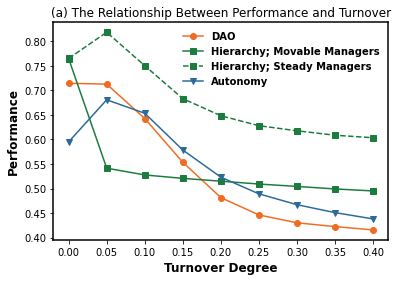

<Figure size 432x288 with 0 Axes>

In [89]:
x = turnover_rate_list
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.xlabel('Turnover Degree', fontweight='bold', fontsize=12)
plt.ylabel('Performance', fontweight='bold', fontsize=12)
plt.plot(x, dao_performance, "-o", label="DAO", color=nature_orange)
plt.plot(x, hierarchy_performance, "-s", label="Hierarchy; Movable Managers", color=nature_green)
plt.plot(x, hierarchy_performance_2, "--s", label="Hierarchy; Steady Managers", color=nature_green)
plt.plot(x, autonomy_performance, "-v", label="Autonomy", color=nature_blue)
plt.legend(frameon=False, ncol=1, fontsize=10, prop=legend_properties)
plt.xticks(x)
plt.title("(a) The Relationship Between Performance and Turnover")
plt.savefig(data_folder + r"\DHA_performance_across_turnover.png", transparent=True, dpi=300)
plt.show()
plt.clf()

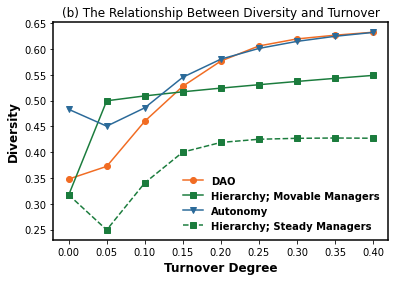

<Figure size 432x288 with 0 Axes>

In [91]:
x = turnover_rate_list
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.xlabel('Turnover Degree', fontweight='bold', fontsize=12)
plt.ylabel('Diversity', fontweight='bold', fontsize=12)
plt.plot(x, dao_diversity, "-o", label="DAO", color=nature_orange)
plt.plot(x, hierarchy_diversity, "-s", label="Hierarchy; Movable Managers", color=nature_green)
plt.plot(x, autonomy_diversity, "-v", label="Autonomy", color=nature_blue)
plt.plot(x, hierarchy_diversity_2, "--s", label="Hierarchy; Steady Managers", color=nature_green)
plt.legend(frameon=False, ncol=1, fontsize=10, prop=legend_properties)
plt.xticks(x)
plt.title("(b) The Relationship Between Diversity and Turnover")
plt.savefig(data_folder + r"\DHA_diversity_across_turnover.png", transparent=True, dpi=300)
plt.show()
plt.clf()

In [65]:
# # Variance
# x = range(len(dao_performance))
# plt.plot(x, dao_variance, "r-", label="DAO")
# plt.plot(x, hierarchy_variance, "b-", label="Hierarchy")
# plt.plot(x, autonomy_variance, "k-", label="Autonomy")
# plt.xlabel('Time', fontweight='bold', fontsize=10)
# plt.ylabel('Variance', fontweight='bold', fontsize=10)
# # plt.xticks(x)
# plt.legend(frameon=False, ncol=1, fontsize=10)
# plt.savefig(data_folder + r"\DHA_variance.png", transparent=False, dpi=300)
# plt.show()
# plt.clf()

In [66]:
# x = range(len(dao_performance))
# # x = range(500)
# plt.plot(x, dao_performance[:len(x)], "r-", label="DAO")
# plt.plot(x, dao_performance_2[:len(x)], "r--", label="DAO_2")
# plt.plot(x, hierarchy_performance[:len(x)], "b-", label="Hierarchy")
# plt.plot(x, hierarchy_performance_2[:len(x)], "b--", label="Hierarchy_2") # TTT
# plt.plot(x, autonomy_performance[:len(x)], "k-", label="Autonomy")
# plt.xlabel('Time', fontweight='bold', fontsize=10)
# plt.ylabel('Performance', fontweight='bold', fontsize=10)
# plt.title("Performance")
# # plt.xticks(x)
# plt.legend(frameon=False, ncol=1, fontsize=10)
# plt.savefig(data_folder + r"\DHA_performance.png", transparent=False, dpi=300)
# plt.show()
# plt.clf()